In [7]:
# !pip install stable-baselines3

  Using cached stable_baselines3-2.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/181.7 kB ? eta -:--:--
   ------------------------------------- - 174.1/181.7 kB 10.2 MB/s eta 0:00:01
   ------------------------------------- - 174.1/181.7 kB 10.2 MB/s eta 0:00:01
   ------------------------------------- - 174.1/181.7 kB 10.2 MB/s eta 0:00:01
   ------------------------------------- - 174.1/181.7 kB 10.2 MB/s eta 0:00:01
   ------------------------------------- - 174.1/181.7 kB 10.2 MB/s eta 0:00:01
   ------------------------------------- - 174.1/181.7 kB 10.2 MB/s eta 0:00:01
   ------------------------------------- - 174.1/181.7 kB 10.2 MB/s eta 0:00:01
   ------------------------------------- - 174.1/181.7 kB 10.2 MB/s eta 0:00:01
   ------------------------------------- - 174.1/181.7 kB 10.2 MB/s eta 0:00:01
   -------------------------------------- 181.7/181.7 kB 421.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/198.5 M


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# !pip install shimmy>=0.2.1


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
#df_course = pd.read_csv('course.csv')
#df_course

In [3]:
# from google.colab import files

# uploaded = files.upload()

In [4]:
df_examreg = pd.read_csv('./ExamRegistration.csv')
df_examreg
# df_examreg = pd.read_csv('./ExamRegistration.csv')
# df_examreg

,Student ID,Course Code
0,5722963,5000130
1,5722689,5000130
2,5722686,5000130
3,5722685,5000130
4,5722684,5000130
...,...,...
4660,6819572,6108202
4661,6819568,6108202
4662,6819563,6108202
4663,6818674,6108202


In [5]:
# from google.colab import files

# uploaded = files.upload()

In [7]:
df_room = pd.read_csv('./RoomCapacity_modified.csv')
df_room

,Room id,Room Name,Room Capacity,RoomType
0,0,H.1.1,63,Lecture Hall
1,1,H.1.2,31,Lecture Hall
2,2,H.1.3,32,Lecture Hall
3,3,H.1.6,24,Lecture Hall
4,4,H.1.7,24,Lecture Hall
5,5,I.2.15,16,Seminar Room
6,6,I.3.19,16,Seminar Room
7,7,I.3.20,27,Seminar Room
8,8,I.3.24,16,Seminar Room
9,9,H.1.11,15,Seminar Room


In [8]:
df_course = pd.read_csv('./course_modified.csv')
df_course

,Course id,Course name
0,5100350,Algebra
1,5101110,Algorithmen und Datenstrukturen II
2,5171020,Artificial Intelligence and Machine Learning
3,6100820,English for E-Commerce
4,5000440,Grundlagen Informatik
...,...,...
128,6100230,Web-Programmierung III
129,6100220,Web Programmierung II
130,6101510,IT-Projektmanagement
131,6100400,Digitale Zeichensysteme


In [ ]:
#  room_capacity = {"H.1.1": 63, "H.1.3": 32, "H.1.2": 31,  "I.3.20": 27, "H.1.6": 24, "H.1.7": 24, "I.2.18/19": 18, "I.2.15": 16, "I.3.19": 16, "I.3.24": 16, "H.1.11": 15, "I.2.1": 10, "I.2.15a": 12}
#  count_of_keys = len(room_capacity.keys())
#  count_of_keys

In [9]:
import pandas as pd
from collections import Counter

def initialize_schedule(df_examreg, df_room, num_days, num_time_slots):

    course_student_counts = df_examreg.groupby('Course Code')['Student ID'].nunique().to_dict()

    room_capacity = {0: 63, 1: 32, 2: 31,  3: 27, 4: 24, 5: 24, 6: 18, 7: 16, 8: 16, 9: 16, 10: 15, 11: 10, 12: 12}
    
    num_rooms = len(room_capacity.keys()) 

    # Create a 3D matrix filled with empty lists
    schedule = [[[0 for _ in range(num_rooms)] for _ in range(num_time_slots)] for _ in range(num_days)]

    day = 0

    courseids = list(sorted(course_student_counts.keys(), key=lambda x: course_student_counts[x], reverse=True)) #Sort courses so courses with greater count of registered student ids are scheduled first

    # print(courseids)
    
    # print(len(courseids))
    
    common_day_student_ids = set() 
    exams_consecutive_days=0

    for day in range(num_days):

        skipped_courses = []  # To keep track of courses which have common students in an already scheduled exam

        # if exams_consecutive_days%2 == 0:
        #     common_day_student_ids = set() 
        common_day_student_ids = set() 
        for time_slot in range(num_time_slots):
            
            room_capacity_copy = room_capacity.copy()   # to refresh rooms in list after a timeslot is scheduled
            courses_per_timeslot = 1

            while courseids and room_capacity_copy:

                course_code = courseids[0]
                student_count = course_student_counts[course_code]

                remaining_students = student_count

                course_student_ids = set(df_examreg[df_examreg['Course Code'] == course_code]['Student ID'])

                if not common_day_student_ids.intersection(course_student_ids):

                    while remaining_students > 0:    # when student count exceeds the room capacity count

                        available_rooms = list(sorted(room_capacity_copy.keys(), key=lambda x: room_capacity_copy[x], reverse=True))    #Sort rooms so larger capcity rooms are scheduled first

                        if available_rooms:

                            room_id = available_rooms[0]
                            schedule[day][time_slot][room_id] = course_code

                            remaining_students -= room_capacity_copy[room_id]
                            del room_capacity_copy[room_id]

                        else:
                            #Makes sure courses if split are scheduled in different rooms as per capacity but within same timeslot
                            skipped_courses.append(courseids.pop(0))
                            for room_id_index in range(num_rooms):
                                if schedule[day][time_slot][room_id_index] == course_code:
                                    schedule[day][time_slot][room_id_index] = 0
                            remaining_students = student_count
                            break

                    course_student_counts[course_code] = remaining_students

                    if remaining_students <= 0:

                        course_student_counts.pop(course_code)
                        courseids.remove(course_code)

                    common_day_student_ids.update(course_student_ids)
                    
                    courses_per_timeslot+=1
                    
                else:
                    skipped_courses.append(courseids.pop(0))
                    if schedule[day][time_slot][room_id] == course_code:
                        del schedule[day][time_slot][room_id]
                        
                if courses_per_timeslot >= 6: # Limiting the courses scheduled to be max 6 within a timeslot
                    break
        courseids.extend(skipped_courses)
        exams_consecutive_days+=1
    print(courseids)
    return schedule

In [10]:
# def initialize_schedule(df_examreg, df_room, num_days, num_time_slots):
#     course_student_counts = df_examreg.groupby('Course Code')['Student ID'].nunique().to_dict()

#     room_capacity = {0: 63, 1: 32, 2: 31, 3: 27, 4: 24, 5: 24, 6: 18, 7: 16, 8: 16, 9: 16, 10: 15, 11: 10, 12: 12}
    
#     num_rooms = len(room_capacity.keys()) 

#     # Create a 3D matrix filled with empty lists
#     schedule = [[[0 for _ in range(num_rooms)] for _ in range(num_time_slots)] for _ in range(num_days)]

#     day = 0

#     courseids = list(course_student_counts.keys())

#     print(courseids)
    
#     print(len(courseids))

#     for day in range(num_days):
#         for time_slot in range(num_time_slots):
#             for room_id in range(num_rooms):
#                 if courseids:
#                     course_code = courseids.pop(0)
#                     schedule[day][time_slot][room_id] = course_code

#     return schedule

In [11]:
num_days = 20
num_time_slots = 4

initial_schedule = initialize_schedule(df_examreg, df_room, num_days, num_time_slots)

[]


In [12]:
# check_soft_constraints(initial_schedule)

NameError: name 'check_soft_constraints' is not defined

In [13]:
initial_schedule

[[[5100020,
   5100020,
   5100020,
   5100020,
   6100820,
   6100820,
   6100820,
   6100820,
   6100820,
   6100820,
   6100820,
   0,
   0],
  [6106202, 5081010, 5004202, 5104212, 5171070, 0, 0, 0, 0, 0, 0, 0, 0],
  [5105213, 6104201, 5103220, 6102110, 5005202, 0, 0, 0, 0, 0, 0, 0, 0],
  [5107201, 6108100, 5074130, 5101310, 5000720, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[5003123, 5003133, 5003190, 5074210, 5100420, 0, 0, 0, 0, 0, 0, 0, 0],
  [5100720,
   5100720,
   5100720,
   5100720,
   6100510,
   6100510,
   6100510,
   6100510,
   6100510,
   6100510,
   6100510,
   0,
   0],
  [5102120, 5081030, 5003065, 5171110, 6101400, 0, 0, 0, 0, 0, 0, 0, 0],
  [5003028, 5003140, 5104211, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[5100350,
   5100350,
   5100350,
   5000130,
   5000130,
   5000130,
   5000130,
   5000130,
   5000130,
   0,
   0,
   0,
   0],
  [5081020, 5003170, 5171080, 5003146, 5003180, 0, 0, 0, 0, 0, 0, 0, 0],
  [5101910, 5003095, 5077120, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 

In [14]:
def display_timetable(matrix_3d):
    for day, day_schedule in enumerate(matrix_3d):
        for time_slot, time_slot_schedule in enumerate(day_schedule):
            for room_id, course_id in enumerate(time_slot_schedule):
                if course_id:
                    #course_id = room_schedule[0]  # Assuming each entry is an integer value
                    print(f"Day: {day + 1}, Time Slot: {time_slot + 1}, Room ID: {room_id}, Course ID: {course_id}")

display_timetable(initial_schedule)


Day: 1, Time Slot: 1, Room ID: 0, Course ID: 5100020
Day: 1, Time Slot: 1, Room ID: 1, Course ID: 5100020
Day: 1, Time Slot: 1, Room ID: 2, Course ID: 5100020
Day: 1, Time Slot: 1, Room ID: 3, Course ID: 5100020
Day: 1, Time Slot: 1, Room ID: 4, Course ID: 6100820
Day: 1, Time Slot: 1, Room ID: 5, Course ID: 6100820
Day: 1, Time Slot: 1, Room ID: 6, Course ID: 6100820
Day: 1, Time Slot: 1, Room ID: 7, Course ID: 6100820
Day: 1, Time Slot: 1, Room ID: 8, Course ID: 6100820
Day: 1, Time Slot: 1, Room ID: 9, Course ID: 6100820
Day: 1, Time Slot: 1, Room ID: 10, Course ID: 6100820
Day: 1, Time Slot: 2, Room ID: 0, Course ID: 6106202
Day: 1, Time Slot: 2, Room ID: 1, Course ID: 5081010
Day: 1, Time Slot: 2, Room ID: 2, Course ID: 5004202
Day: 1, Time Slot: 2, Room ID: 3, Course ID: 5104212
Day: 1, Time Slot: 2, Room ID: 4, Course ID: 5171070
Day: 1, Time Slot: 3, Room ID: 0, Course ID: 5105213
Day: 1, Time Slot: 3, Room ID: 1, Course ID: 6104201
Day: 1, Time Slot: 3, Room ID: 2, Course ID: 

In [15]:
timeslots = {0: '8:00 - 10:00', 1: '11:00 - 13:00', 2: '14:00 - 16:00',  3: '15:00 - 17:00'}
days = {0: 'Monday(1/29)', 1: 'Tuesday(1/30)', 2: 'Wednesday(1/31)', 3: 'Thursday(2/1)', 4: 'Friday(2/1)', 5: 'Monday(2/5)', 6: 'Tuesday(2/6)', 7: 'Wednesday(2/7)',  8: 'Thursday(2/8)', 9: 'Friday(2/9)',
         10: 'Monday(2/12)', 11: 'Tuesday(2/13)', 12: 'Wednesday(2/14)',  13: 'Thursday(2/15)', 14: 'Friday(2/16)', 15: 'Monday(2/19)', 16: 'Tuesday(2/20)', 17: 'Wednesday(2/21)',  18: 'Thursday(2/22)', 19: 'Friday(2/23)'}
print('Winter Semester Exam Schedule for Technical University of Applied Sciences Würzburg-Schweinfurt(WS 2024)')
#def display_timetable(initial_schedule, df_course, df_room):
data = []
for day, day_schedule in enumerate(initial_schedule):
    for time_slot, time_slot_schedule in enumerate(day_schedule):
        for room_id, course_id in enumerate(time_slot_schedule):
            # Look up course name from df_courses
            course_info = df_course[df_course['Course id'] == course_id]
            
            if not course_info.empty:
                course_name = course_info['Course name'].values[0]
            else:
                if course_id == 0:
                    course_name = 'No exam'
                else:
                    course_name = str(course_id)

            # Look up room name from df_rooms
            room_name = df_room[df_room['Room id'] == room_id]['Room Name'].values[0]
            timeslot_name=timeslots[time_slot]
            day_name=days[day]
            if course_id != 0:
                print(f"Day: {day_name}, Time Slot: {timeslot_name}, Room Name: {room_name}, Course Name: {course_name} ({course_id})")
                course = str(course_name) + ' '+ str([course_id])
                data.append([day_name, timeslot_name, room_name, course])

#display_timetable(initial_schedule, df_course, df_room)

Winter Semester Exam Schedule for Technical University of Applied Sciences Würzburg-Schweinfurt(WS 2024)
Day: Monday(1/29), Time Slot: 8:00 - 10:00, Room Name: H.1.1, Course Name: Algorithmen und Datenstrukturen I (5100020)
Day: Monday(1/29), Time Slot: 8:00 - 10:00, Room Name: H.1.2, Course Name: Algorithmen und Datenstrukturen I (5100020)
Day: Monday(1/29), Time Slot: 8:00 - 10:00, Room Name: H.1.3, Course Name: Algorithmen und Datenstrukturen I (5100020)
Day: Monday(1/29), Time Slot: 8:00 - 10:00, Room Name: H.1.6, Course Name: Algorithmen und Datenstrukturen I (5100020)
Day: Monday(1/29), Time Slot: 8:00 - 10:00, Room Name: H.1.7, Course Name: English for E-Commerce (6100820)
Day: Monday(1/29), Time Slot: 8:00 - 10:00, Room Name: I.2.15, Course Name: English for E-Commerce (6100820)
Day: Monday(1/29), Time Slot: 8:00 - 10:00, Room Name: I.3.19, Course Name: English for E-Commerce (6100820)
Day: Monday(1/29), Time Slot: 8:00 - 10:00, Room Name: I.3.20, Course Name: English for E-Com

Day: Thursday(2/8), Time Slot: 8:00 - 10:00, Room Name: H.1.1, Course Name: Grundlagen Informatik (5000440)
Day: Thursday(2/8), Time Slot: 8:00 - 10:00, Room Name: H.1.2, Course Name: Grundlagen Informatik (5000440)
Day: Thursday(2/8), Time Slot: 8:00 - 10:00, Room Name: H.1.3, Course Name: Software Engineering (6101600)
Day: Thursday(2/8), Time Slot: 8:00 - 10:00, Room Name: H.1.6, Course Name: Software Engineering (6101600)
Day: Thursday(2/8), Time Slot: 8:00 - 10:00, Room Name: H.1.7, Course Name: Software Engineering (6101600)
Day: Thursday(2/8), Time Slot: 8:00 - 10:00, Room Name: I.2.15, Course Name: Statistik (5101400)
Day: Thursday(2/8), Time Slot: 8:00 - 10:00, Room Name: I.3.19, Course Name: Statistik (5101400)
Day: Thursday(2/8), Time Slot: 8:00 - 10:00, Room Name: I.3.20, Course Name: Statistik (5101400)
Day: Thursday(2/8), Time Slot: 8:00 - 10:00, Room Name: I.3.24, Course Name: Statistik (5101400)
Day: Thursday(2/8), Time Slot: 8:00 - 10:00, Room Name: H.1.11, Course Name

In [16]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
import pandas as pd

# Create a DataFrame from the data
df_report = pd.DataFrame(data, columns=['Day', 'Time Slot', 'Room Name', 'Course Name'])

# Create a PDF report
def create_pdf_report(df):
    doc = SimpleDocTemplate("exam_schedule.pdf", pagesize=letter)
    table_data = [df.columns.tolist()] + df.values.tolist()
    table = Table(table_data)

    # Add style to table
    style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                        ('GRID', (0, 0), (-1, -1), 1, colors.black)])
    table.setStyle(style)

    # Add table to the PDF
    doc.build([table])

# Generate PDF report
create_pdf_report(df_report)


In [17]:
# df_schedule = pd.DataFrame(columns=range(1, num_time_slots_per_day + 1))

# for day, day_schedule in enumerate(initial_schedule, start=1):
#     for time_slot, time_slot_schedule in enumerate(day_schedule, start=1):
#         course_room_pairs = [(course, room) for course, room in time_slot_schedule]
#         df_schedule.at[day, time_slot] = course_room_pairs

# df_schedule.to_csv('initial_schedule.csv')

In [18]:

import random as rn
def random_day_assignment(current_timetable):
    try:
        timeslot_index = rn.randint(0, len(current_timetable[0]) - 1)
        room_index = rn.randint(0, len(current_timetable[0][0]) - 1)

        day_index_1, day_index_2 = rn.sample(range(len(current_timetable)), 2)
        
        current_timetable[day_index_1][timeslot_index][room_index], current_timetable[day_index_2][timeslot_index][room_index] = \
            current_timetable[day_index_2][timeslot_index][room_index], current_timetable[day_index_1][timeslot_index][room_index]
    except IndexError:
        print("Error applying heuristic: list index out of range")
        
    return current_timetable


In [19]:
def random_room_assignment(current_timetable):
    try:
        day_index = rn.randint(0, len(current_timetable) - 1)
        timeslot_index = rn.randint(0, len(current_timetable[0]) - 1)
        
        room_index_1, room_index_2 = rn.sample(range(len(current_timetable[0][0])), 2)

        current_timetable[day_index][timeslot_index][room_index_1], current_timetable[day_index][timeslot_index][room_index_2] = \
            current_timetable[day_index][timeslot_index][room_index_2], current_timetable[day_index][timeslot_index][room_index_1]
    except IndexError:
        print("Error applying heuristic: list index out of range")
        
    return current_timetable


In [20]:
def random_timeslot_assignment(current_timetable):
    try:
        
        day_index = rn.randint(0, len(current_timetable) - 1)
        room_index = rn.randint(0, len(current_timetable[0][0]) - 1)

        timeslot_index_1, timeslot_index_2 = rn.sample(range(len(current_timetable[0])), 2)

        current_timetable[day_index][timeslot_index_1][room_index], current_timetable[day_index][timeslot_index_2][room_index] = \
            current_timetable[day_index][timeslot_index_2][room_index], current_timetable[day_index][timeslot_index_1][room_index]
    except IndexError:
        print("Error applying heuristic: list index out of range")
        
    return current_timetable


In [21]:
def random_day_timeslot_assignment(current_timetable):
    try:
        
        day_index_1, day_index_2 = rn.sample(range(len(current_timetable)), 2)
        timeslot_index_1, timeslot_index_2 = rn.sample(range(len(current_timetable[0])), 2)

        room_index = rn.randint(0, len(current_timetable[0][0]) - 1)

        current_timetable[day_index_1][timeslot_index_1][room_index], current_timetable[day_index_2][timeslot_index_2][room_index] = \
            current_timetable[day_index_2][timeslot_index_2][room_index], current_timetable[day_index_1][timeslot_index_1][room_index]
        
    except IndexError:
        print("Error applying heuristic: list index out of range")
        
    return current_timetable


In [22]:
def random_day_room_assignment(current_timetable):
    try:

        day_index_1, day_index_2 = rn.sample(range(len(current_timetable)), 2)
        room_index_1, room_index_2 = rn.sample(range(len(current_timetable[0][0])), 2)
        
        timeslot_index = rn.randint(0, len(current_timetable[0]) - 1)
        
        current_timetable[day_index_1][timeslot_index][room_index_1], current_timetable[day_index_2][timeslot_index][room_index_2] = \
            current_timetable[day_index_2][timeslot_index][room_index_2], current_timetable[day_index_1][timeslot_index][room_index_1]
        
    except IndexError:
        print("Error applying heuristic: list index out of range")
        
    return current_timetable

In [23]:
def random_timeslot_room_assignment(current_timetable):
    try:
        
        timeslot_index_1, timeslot_index_2 = rn.sample(range(len(current_timetable[0])), 2)
        room_index_1, room_index_2 = rn.sample(range(len(current_timetable[0][0])), 2)
        
        day_index = rn.randint(0, len(current_timetable) - 1)
        
        current_timetable[day_index][timeslot_index_1][room_index_1], current_timetable[day_index][timeslot_index_2][room_index_2] = \
            current_timetable[day_index][timeslot_index_2][room_index_2], current_timetable[day_index][timeslot_index_1][room_index_1]
        
    except IndexError:
        print("Error applying heuristic: list index out of range")
        
    return current_timetable

In [24]:
def random_day_timeslot_room_assignment(current_timetable):
    try:
        
        day_index_1, day_index_2 = rn.sample(range(len(current_timetable)), 2)
        timeslot_index_1, timeslot_index_2 = rn.sample(range(len(current_timetable[0])), 2)
        room_index_1, room_index_2 = rn.sample(range(len(current_timetable[0][0])), 2)
        
        current_timetable[day_index_1][timeslot_index_1][room_index_1], current_timetable[day_index_2][timeslot_index_2][room_index_2] = \
            current_timetable[day_index_2][timeslot_index_2][room_index_2], current_timetable[day_index_1][timeslot_index_1][room_index_1]
        
    except IndexError:
        print("Error applying heuristic: list index out of range")
        
    return current_timetable

In [25]:
# a

NameError: name 'a' is not defined

In [30]:
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_timeslot_room_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_timeslot_room_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_timeslot_room_assignment(initial_schedule)
initial_schedule=random_room_assignment(initial_schedule)
initial_schedule=random_room_assignment(initial_schedule)
initial_schedule=random_timeslot_assignment(initial_schedule)
initial_schedule=random_timeslot_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_timeslot_room_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_room_assignment(initial_schedule)
initial_schedule=random_room_assignment(initial_schedule)
initial_schedule=random_timeslot_assignment(initial_schedule)
initial_schedule=random_timeslot_assignment(initial_schedule)
initial_schedule=random_timeslot_room_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_timeslot_room_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_room_assignment(initial_schedule)
initial_schedule=random_room_assignment(initial_schedule)
initial_schedule=random_timeslot_assignment(initial_schedule)
initial_schedule=random_timeslot_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_timeslot_room_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_timeslot_room_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_day_assignment(initial_schedule)
initial_schedule=random_room_assignment(initial_schedule)
initial_schedule=random_room_assignment(initial_schedule)
initial_schedule=random_timeslot_assignment(initial_schedule)
initial_schedule=random_timeslot_assignment(initial_schedule)

In [31]:
from itertools import combinations
#room_capacity = {"H.1.1": 63, "H.1.3": 32, "H.1.2": 31,  "I.3.20": 27, "H.1.6": 24, "H.1.7": 24, "I.2.18/19": 18, "I.2.15": 16, "I.3.19": 16, "I.3.24": 16, "H.1.11": 15, "I.2.1": 10, "I.2.15a": 12}
room_capacity = {0: 63, 1: 32, 2: 31,  3: 27, 4: 24, 5: 24, 6: 18, 7: 16, 8: 16, 9: 16, 10: 15, 11: 10, 12: 12}
course_student_counts = df_examreg.groupby('Course Code')['Student ID'].nunique().to_dict()

In [32]:
def check_hard_constraints(schedule):
    hard_constraints_violations = 0
    h1_hard_constraints = 0
    h2_hard_constraints = 0
    h3_hard_constraints = 0
    h4_hard_constraints = 0
    courses_scheduled=[]
    
    #make it global
    room_capacity = {0: 63, 1: 32, 2: 31,  3: 27, 4: 24, 5: 24, 6: 18, 7: 16, 8: 16, 9: 16, 10: 15, 11: 10, 12: 12}
    for day, timeslots in enumerate(schedule):
        
        h2_room_capacity_violation = 0
        
        for time_slot, rooms in enumerate(timeslots):
            
            students_by_course = {}  
            course_capacity_by_room = {}
            h1_common_students_violations = 0
            exam_rooms_set = set()
            room_id = 0
            courses_scheduled_timeslot =[]
            
            for course_code in rooms:
                h3_room_timeslot=0
                # H1: A student cannot sit more than one exam at the same time.
                
                if course_code not in students_by_course and course_code!=0:
                    
                    existing_students = students_by_course.get(course_code, set())
                    new_students = set(df_examreg[df_examreg['Course Code'] == course_code]['Student ID'])
                    students_by_course[course_code] = existing_students.union(new_students)
                    
                # H2: The capacity of the exam should not exceed the room capacity.
                
                room_capacity_value = room_capacity.get(room_id, 0)

                if course_code in course_capacity_by_room:
                    course_capacity_by_room[course_code].append(room_capacity_value)
                else:
                    course_capacity_by_room[course_code] = [room_capacity_value]
                
                # CHECK H3 : No exam scheduled in the same room at the same time   
                # Check if the room_id has already been seen
                if room_id in exam_rooms_set:
                    #print(f"Constraint violation for unique Rooms in a timeslot: Room {room_id} is assigned to multiple courses.")
                    h3_room_timeslot+=  1
                else:
                    exam_rooms_set.add(room_id)
                    
                room_id+=1
                
                if course_code == 0 or course_code in courses_scheduled_timeslot:
                    pass
                else:
                    courses_scheduled_timeslot.append(course_code)
            
            courses_scheduled.extend(courses_scheduled_timeslot)    
                
            # CHECK H1: A student cannot sit more than one exam at the same time.        
            for keys_combination in combinations(students_by_course.keys(), 2):
                sets_to_compare = [students_by_course[key] for key in keys_combination]

                common_students = set.intersection(*sets_to_compare)

                if common_students:
                    h1_common_students_violations += len(common_students)

            # if h1_common_students_violations:
            #     print("Constraint violation for exam scheduled for common students simultaneously", h1_common_students_violations)
                #hard_constraints_violations+= h1_common_students_violations * 10
            
            #CHECK H2: The capacity of the exam should not exceed the room capacity.
            for course_code, capacities in course_capacity_by_room.items():
            # Get the count of students registered for the course
                student_count = course_student_counts.get(course_code, 0)

                # Check if the sum of capacities is greater than the student count
                if student_count > sum(capacities):
                    #print(f"Constraint violation for course room capacity {course_code}: Sum of student count exceeds capacity.")
                    h2_room_capacity_violation+=  1
        # print(f'Day {day + 1} - H1 Violations',h1_common_students_violations)          
        # print(f'Day {day + 1} - H2 Violations',h2_room_capacity_violation)
        # print(f'Day {day + 1} - H3 Violations',h3_room_timeslot)  
        hard_constraints_violations+= h1_common_students_violations + h2_room_capacity_violation + h3_room_timeslot
        h1_hard_constraints+= h1_common_students_violations
        h2_hard_constraints+= h2_room_capacity_violation
        h3_hard_constraints+= h3_room_timeslot
    print('Total H1 violations', h1_hard_constraints)
    print('Total H2 violations', h2_hard_constraints)
    print('Total H3 violations', h3_hard_constraints)
    duplicate_courses_scheduled = {x for x in courses_scheduled if courses_scheduled.count(x) > 1}
    h4_hard_constraints=len(duplicate_courses_scheduled)
    print('Total H4 violations', h4_hard_constraints)
    return h1_hard_constraints, h2_hard_constraints, h3_hard_constraints, h4_hard_constraints

In [33]:
# course_student_counts

In [34]:
hard_constraints = check_hard_constraints(initial_schedule)
hard_constraints

Total H1 violations 0
Total H2 violations 76
Total H3 violations 0
Total H4 violations 32


(0, 76, 0, 32)

In [35]:
from collections import Counter
course_student_counts = df_examreg.groupby('Course Code')['Student ID'].nunique().to_dict()
course_student_counts

{5000130: 115,
 5000220: 80,
 5000340: 89,
 5000350: 40,
 5000420: 1,
 5000430: 95,
 5000440: 94,
 5000510: 95,
 5000610: 24,
 5000720: 1,
 5000730: 67,
 5000910: 30,
 5001010: 6,
 5001110: 59,
 5001310: 29,
 5001410: 51,
 5001610: 30,
 5001710: 74,
 5001820: 25,
 5001900: 68,
 5002030: 21,
 5002130: 12,
 5002810: 12,
 5003028: 13,
 5003065: 24,
 5003084: 20,
 5003092: 5,
 5003095: 3,
 5003109: 9,
 5003123: 1,
 5003130: 6,
 5003133: 1,
 5003140: 7,
 5003143: 18,
 5003144: 9,
 5003146: 19,
 5003154: 11,
 5003167: 3,
 5003170: 23,
 5003180: 13,
 5003188: 24,
 5003189: 9,
 5003190: 1,
 5003194: 9,
 5003198: 6,
 5003199: 14,
 5003220: 15,
 5003230: 60,
 5003802: 13,
 5003803: 4,
 5003804: 8,
 5004202: 25,
 5005202: 6,
 5007212: 26,
 5071038: 8,
 5071054: 8,
 5071058: 14,
 5074130: 4,
 5074210: 1,
 5077120: 3,
 5081010: 28,
 5081020: 26,
 5081030: 27,
 5081040: 23,
 5081130: 11,
 5081504: 18,
 5100020: 141,
 5100130: 111,
 5100220: 49,
 5100230: 57,
 5100240: 2,
 5100350: 124,
 5100360: 39,

In [36]:
sorted_course_student_counts = dict(sorted(course_student_counts.items(), key=lambda item: item[1], reverse=True))

print(sorted_course_student_counts)

{5100020: 141, 5100720: 135, 6100820: 126, 5100350: 124, 5101620: 123, 6100510: 120, 5100920: 117, 5000130: 115, 5100130: 111, 6100600: 107, 6100310: 104, 6100120: 101, 6102310: 100, 5000430: 95, 5000510: 95, 5000440: 94, 6102210: 93, 5000340: 89, 5000220: 80, 6101600: 80, 6102700: 79, 5001710: 74, 6101210: 74, 6102010: 74, 5001900: 68, 5000730: 67, 6100230: 65, 5101010: 63, 5102200: 63, 5101400: 61, 5003230: 60, 5001110: 59, 5100230: 57, 5101730: 54, 6102600: 53, 5001410: 51, 6100320: 51, 5100220: 49, 6101810: 46, 5101110: 42, 5000350: 40, 5100360: 39, 5102120: 35, 5000910: 30, 5001610: 30, 5001310: 29, 6100220: 29, 6100920: 29, 6106202: 29, 5081010: 28, 5081030: 27, 5007212: 26, 5081020: 26, 5001820: 25, 5004202: 25, 5101820: 25, 5104212: 25, 6101510: 25, 5000610: 24, 5003065: 24, 5003188: 24, 5003170: 23, 5081040: 23, 5171070: 22, 5171110: 22, 6100710: 22, 6108202: 22, 5002030: 21, 5171080: 21, 6101400: 21, 5003084: 20, 5171090: 20, 5003146: 19, 5003143: 18, 5081504: 18, 5100620: 17

In [37]:
ideal_order_schedule=[]
ideal_order_schedule.extend(sorted_course_student_counts.keys())
ideal_order_schedule

[5100020,
 5100720,
 6100820,
 5100350,
 5101620,
 6100510,
 5100920,
 5000130,
 5100130,
 6100600,
 6100310,
 6100120,
 6102310,
 5000430,
 5000510,
 5000440,
 6102210,
 5000340,
 5000220,
 6101600,
 6102700,
 5001710,
 6101210,
 6102010,
 5001900,
 5000730,
 6100230,
 5101010,
 5102200,
 5101400,
 5003230,
 5001110,
 5100230,
 5101730,
 6102600,
 5001410,
 6100320,
 5100220,
 6101810,
 5101110,
 5000350,
 5100360,
 5102120,
 5000910,
 5001610,
 5001310,
 6100220,
 6100920,
 6106202,
 5081010,
 5081030,
 5007212,
 5081020,
 5001820,
 5004202,
 5101820,
 5104212,
 6101510,
 5000610,
 5003065,
 5003188,
 5003170,
 5081040,
 5171070,
 5171110,
 6100710,
 6108202,
 5002030,
 5171080,
 6101400,
 5003084,
 5171090,
 5003146,
 5003143,
 5081504,
 5100620,
 5171100,
 5003220,
 5003199,
 5071058,
 5003028,
 5003180,
 5003802,
 5105213,
 6104201,
 5002130,
 5002810,
 5003154,
 5081130,
 5171020,
 5003109,
 5003144,
 5003189,
 5003194,
 5003804,
 5071038,
 5071054,
 5171513,
 5003140,
 5103220,


In [38]:
def check_soft_constraints(schedule):
    soft_constraints_violations = 0
    s1_soft_constraints = 0
    s2_soft_constraints = 0
    s6_soft_constraints=0
    
    all_courses_scheduled=[]

    students_last_day = {}  # Dictionary to store the last scheduled day for each student

    for day, timeslots in enumerate(schedule):
        
        s1_daily_students_violations = 0
        s2_daily_consecutive_violations = 0
        s6_max_courses_timselot_violations = 0

        for _, rooms in enumerate(timeslots):
            
            unique_course_codes = set(course_code for course_code in rooms if course_code != 0) # Coz, courses can be split accross multiple rooms to satisfy room capacities constraints
            all_courses_scheduled.extend(unique_course_codes)
            for course_code in unique_course_codes:
                # Track the last scheduled day for each student
                students = set(df_examreg[df_examreg['Course Code'] == course_code]['Student ID'])
                for student_id in students:
                    last_day = students_last_day.get(student_id, None)
                    #print(last_day, student_id)
                    if last_day == day :
                        # CHECK S1 More than 1 exam in a day: minimize student sitting consecutive exams on the same day.
                        s1_daily_students_violations += 1
                    elif last_day == day - 1:
                        #print(last_day, student_id)
                        # Student has an exam on consecutive days
                        s2_daily_consecutive_violations += 1
                    students_last_day[student_id] = day

            if len(unique_course_codes) > 6:
                s6_max_courses_timselot_violations+=1   
                
        # print(f'Day {day + 1} - S1 Violations:', s1_daily_students_violations)
        # print(f'Day {day + 1} - S2 Violations:', s2_daily_consecutive_violations)

        soft_constraints_violations += s1_daily_students_violations + s2_daily_consecutive_violations
        s1_soft_constraints+= s1_daily_students_violations
        s2_soft_constraints+= s2_daily_consecutive_violations
        s6_soft_constraints+=s6_max_courses_timselot_violations
        #print('Soft constraint violation', soft_constraints_violations)
    # print('Total S1 violations', s1_soft_constraints)
    # print('Total S2 violations', s2_soft_constraints)
    # print('Total S6 violations', s6_soft_constraints)

    #if len(ideal_order_schedule) == len(all_courses_scheduled):
        #print("All courses are scheduled")
        
    #t(all_courses_scheduled)
    return s1_soft_constraints, s2_soft_constraints, s6_soft_constraints


In [39]:
soft_constraints = check_soft_constraints(initial_schedule)
soft_constraints

(2087, 2896, 2)

In [40]:
num_rooms = 13

In [41]:
initial_schedule

[[[5100020,
   5100020,
   5100020,
   0,
   6100820,
   6100820,
   6100820,
   6100820,
   6100820,
   0,
   6100820,
   0,
   0],
  [6106202, 5081010, 0, 5104212, 5171070, 0, 0, 0, 0, 5101620, 0, 0, 0],
  [5105213, 6104201, 5103220, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [5107201, 0, 5074130, 5101310, 6108100, 0, 5004202, 0, 0, 6100820, 0, 0, 0]],
 [[5003123, 5003133, 5003190, 5074210, 5100420, 0, 0, 0, 5101010, 0, 0, 0, 0],
  [5100720,
   5071054,
   0,
   5100720,
   6100510,
   6100510,
   0,
   6100510,
   6100510,
   6100510,
   6100510,
   6100510,
   0],
  [5102120, 5081030, 5003065, 0, 6101400, 0, 0, 0, 0, 0, 0, 0, 0],
  [5003028, 5003140, 0, 0, 0, 0, 0, 0, 0, 5104211, 0, 0, 0]],
 [[5100350, 5100350, 0, 5000130, 0, 0, 5000130, 0, 5000130, 0, 0, 0, 0],
  [0, 0, 5171080, 5003146, 5003180, 0, 0, 0, 0, 0, 0, 0, 0],
  [5101910, 0, 5077120, 5000130, 0, 0, 0, 5000130, 0, 0, 0, 0, 0],
  [0, 5003170, 0, 0, 5000130, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[5101620,
   5101620,
   6101210,
   0,
   6100

In [42]:
flat_schedule = [value for day in initial_schedule for timeslot in day for value in timeslot if value != 0]

print("Flat Schedule:", flat_schedule)

unique_schedule = []
for value in flat_schedule:
    if value not in unique_schedule:
        unique_schedule.append(value)

print("Unique Schedule:", unique_schedule)

Flat Schedule: [5100020, 5100020, 5100020, 6100820, 6100820, 6100820, 6100820, 6100820, 6100820, 6106202, 5081010, 5104212, 5171070, 5101620, 5105213, 6104201, 5103220, 5107201, 5074130, 5101310, 6108100, 5004202, 6100820, 5003123, 5003133, 5003190, 5074210, 5100420, 5101010, 5100720, 5071054, 5100720, 6100510, 6100510, 6100510, 6100510, 6100510, 6100510, 6100510, 5102120, 5081030, 5003065, 6101400, 5003028, 5003140, 5104211, 5100350, 5100350, 5000130, 5000130, 5000130, 5171080, 5003146, 5003180, 5101910, 5077120, 5000130, 5000130, 5003170, 5000130, 5101620, 5101620, 6101210, 6100600, 6100600, 6100600, 6100600, 5001410, 5007212, 5100720, 5081040, 6108202, 5003194, 5003198, 5003092, 5102810, 5003167, 5000420, 5100920, 5100920, 6100310, 6100310, 6100310, 6100310, 6100310, 6102600, 5081504, 5171100, 5003220, 5003144, 5101510, 5101700, 6108201, 5003199, 6100600, 5100130, 5100130, 6100120, 6100120, 6100120, 6100120, 6100920, 5002130, 6100120, 5171020, 5101320, 5003084, 5003802, 5100130, 500

In [43]:
courseids = list(sorted(course_student_counts.keys(), key=lambda x: course_student_counts[x], reverse=True))
len(courseids)

136

In [44]:
def courses_to_schedule(course, day1):
    
    flat_schedule = [value for day in initial_schedule if (initial_schedule.index(day) == day1 or initial_schedule.index(day) == day1 +1) for timeslot in day for value in timeslot if value != 0]

    unique_schedule = []
    for value in flat_schedule:
        if value not in unique_schedule:
            unique_schedule.append(value)
    
    filtered_student_ids = df_examreg[df_examreg['Course Code'].isin(unique_schedule)]['Student ID'].tolist()
    
    new_course_students = df_examreg[df_examreg['Course Code'] == course]['Student ID'].tolist()

    if not any(student_id in filtered_student_ids for student_id in new_course_students):
        print("Course can be scheduled.")
    else:
        print("At least one student ID is already scheduled for this course.")

    
course=6102310
courses_to_schedule(5000510,2)

At least one student ID is already scheduled for this course.


trial

In [45]:
# class ExamSchedulingEnv:
#     def __init__(self, initial_solution):
#         # Initialize environment with the initial solution
#         self.state = initial_solution
#         self.current_step = 0
#         self.total_steps = max_steps  # Define your maximum number of steps

#     def reset(self):
#         # Reset the environment to the initial state
#         self.state = initial_solution
#         self.current_step = 0

#     def step(self, action):
#         # Execute the action and update the state
#         # Return the new state, reward, and whether the episode is done
#         self.current_step += 1
#         new_state, reward, done = execute_action(self.state)
#         self.state = new_state
#         return new_state, reward, done

#     def render(self):
#         # Optional: Visualize the current state of the environment
#         pass
        

In [46]:
# # Example: Actions can be represented as a list of possible changes to the schedule
# action_space = [
#     ("swap", course_1, timeslot_1, course_2, timeslot_2),
#     ("split", course, timeslot, room_1, room_2),
#     # Add other possible actions
# ]


In [47]:
# class PPOAgent:
#     def __init__(self, state_dim, action_dim):
#         # Initialize the PPO agent with neural networks, optimizer, etc.
#         # Define your actor and critic networks, optimizer, etc.

#     def choose_action(self, state):
#         # Choose an action based on the current state using the policy network
#         # Return the selected action and its probability distribution

#     def train(self, states, actions, advantages, returns, old_probabilities):
#         # Update the policy and value networks based on collected experiences
#         # Use the Proximal Policy Optimization algorithm


In [48]:
# env = ExamSchedulingEnv(initial_solution)
# agent = PPOAgent(state_dim, action_dim)

# for epoch in range(num_epochs):
#     states, actions, rewards, old_probabilities = [], [], [], []

#     for _ in range(num_episodes):
#         state = env.reset()
#         done = False

#         while not done:
#             action, probability = agent.choose_action(state)
#             new_state, reward, done = env.step(action)

#             states.append(state)
#             actions.append(action)
#             rewards.append(reward)
#             old_probabilities.append(probability)

#             state = new_state

#     # Calculate advantages and returns using rewards and value function
#     advantages, returns = calculate_advantages_and_returns(rewards)

#     # Train the PPO agent
#     agent.train(states, actions, advantages, returns, old_probabilities)


In [49]:
# def execute_action(state, action):
#     # Implement the logic to execute the action, update the state, and calculate the reward
#     # Return the new state, reward, and whether the episode is done


done

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
import gym
from gym import spaces
from copy import deepcopy
import random as rn
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import datetime
import plotly.offline as pyo

class TensorCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(TensorCallback, self).__init__(verbose)
        self.episode_rewards = []

    def _on_step(self) -> bool:

        print(f"Total Timesteps: {self.num_timesteps}")
        return True

    def _on_episode_end(self) -> None:
        self.episode_rewards.append(self.model.ep_info_buffer[0]['r'])
        mean_reward = np.mean(self.episode_rewards[-10:])
        print(f"Mean Reward (last 10 episodes): {mean_reward}")


class CourseEnv(gym.Env):
    def __init__(self, initial_schedule, num_days, num_time_slots, num_rooms, steps, heuristic_prob=1):
        super(CourseEnv, self).__init__()
        
        self.state = initial_schedule
        self.initial_schedule = deepcopy(initial_schedule)
        self.num_days = num_days
        self.num_time_slots = num_time_slots
        self.current_step = 0
        self.steps = steps
        self.heuristic_prob = heuristic_prob  # Probability of using heuristics
        self.num_rooms = num_rooms
        self.penalty=0

        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=1, shape=(self.num_days, self.num_time_slots, self.num_rooms), dtype=np.float32)
        #self.observation_space = spaces.Discrete(1040)       
        self.render()
        self.log= {'H1' : [], 'H2' : [], 'H3' : [], 'H4' : [], 'S1': [], 'S2' : [], 'S6' : []}
        #self.log= {'H1' : 0, 'H2' : 0, 'H3' : 0, 'H4' : 0, 'S1': 0, 'S2' : 0}
        self.hard_constraints=0
        self.penalties = []
        
    def step(self, action):
        self.current_step += 1
        info = {}
        #if np.random.rand() < self.heuristic_prob:
        self.apply_heuristic()

        constraint_penalty, hard_constraints, soft_constraints  = self.evaluate(self.state)  
        self.hard_constraints +=hard_constraints
        print('Constraint penalty', constraint_penalty)
        self.penalty += constraint_penalty 

        done = self.current_step >= self.steps or hard_constraints == 0  #logic change
        self.penalties.append(hard_constraints == 0)
        if done:
            self.reset()
        
        return np.array(self.state, dtype=np.float32), self.penalty, done, info

    
    def evaluate(self, current_timetable):
        h1_hard_constraints, h2_hard_constraints, h3_hard_constraints, h4_hard_constraints = check_hard_constraints(current_timetable)
        s1_soft_constraints, s2_soft_constraints, s6_soft_constraints = check_soft_constraints(current_timetable)
        
        self.log['H1'].append(h1_hard_constraints)
        self.log['H2'].append(h2_hard_constraints)
        self.log['H3'].append(h3_hard_constraints)
        self.log['H4'].append(h4_hard_constraints)
        self.log['S1'].append(s1_soft_constraints)
        self.log['S2'].append(s2_soft_constraints)
        self.log['S6'].append(s6_soft_constraints)
        
        weight_h1_hard_constraints = 0.7 
        weight_h2_hard_constraints = 1  
        weight_h3_hard_constraints = 0.5 
        weight_h4_hard_constraints = 0.9
        weight_s1_soft_constraints = -0.2  
        weight_s2_soft_constraints = -0.15  
        weight_s6_soft_constraints = -0.1
        
        h1_hard = weight_h1_hard_constraints * h1_hard_constraints
        h2_hard = weight_h2_hard_constraints * h2_hard_constraints
        h3_hard = weight_h3_hard_constraints * h3_hard_constraints
        h4_hard = weight_h4_hard_constraints * h4_hard_constraints
        s1_soft = weight_s1_soft_constraints * s1_soft_constraints
        s2_soft = weight_s2_soft_constraints * s2_soft_constraints
        s6_soft = weight_s6_soft_constraints * s6_soft_constraints
        
        total_penalty = (
        h1_hard +
        h2_hard +
        h3_hard +
        h4_hard +
        s1_soft +
        s2_soft +
        s6_soft
    )
        
        hard_constraints = h1_hard_constraints + h2_hard_constraints + h3_hard_constraints + h4_hard_constraints
        soft_constraints = s1_soft_constraints + s2_soft_constraints + s6_soft_constraints
    
        return total_penalty, hard_constraints, soft_constraints 


    def apply_heuristic(self):
        
        heuristics = [random_day_assignment, random_timeslot_assignment, random_room_assignment, random_timeslot_room_assignment]
        #heuristics = [random_day_assignment, random_timeslot_assignment, random_room_assignment, random_day_timeslot_assignment, random_day_room_assignment, random_timeslot_room_assignment, random_day_timeslot_room_assignment]
        #heuristics = [random_day_assignment, random_room_assignment, random_day_room_assignment]
        heuristic_choice = rn.choice(heuristics)

        try:
            self.state=heuristic_choice(self.state)
        except Exception as e:
            print(f"Error applying heuristic: {e}")

    def render(self, mode='human'):
    
        rendered_schedule = ""
                
        for day, day_schedule in enumerate(self.state):
            for time_slot, time_slot_schedule in enumerate(day_schedule):
                for room_id, room_schedule in enumerate(time_slot_schedule):
                    if room_schedule:
                        rendered_schedule += f"Day: {day + 1}, Time Slot: {time_slot + 1}, Room ID: {room_id + 1}, Course ID: {room_schedule}\n"

        #print(rendered_schedule)
        # clear_output(wait=True)  # Clear the previous output
        # display(rendered_schedule)  # Display the updated schedule
        #return rendered_schedule
        
        # fig, axs = plt.subplots(self.num_days, self.num_time_slots, figsize=(15, 20))

        # for day in range(self.num_days):
        #     for time_slot in range(self.num_time_slots):
        #         ax = axs[day, time_slot]

        #         # Get the room occupancy for the current day and timeslot
        #         room_occupancy = self.state[day][time_slot]

        #         # Create a bar plot for room occupancy
        #         ax.bar(range(self.num_rooms), room_occupancy, color='blue')

        #         # ax.set_title(f'Day {day + 1}, Time Slot {time_slot + 1}')
        #         # ax.set_xlabel('Room ID')
        #         # ax.set_ylabel('Occupancy')

        # plt.tight_layout()
        # plt.show()
        
        df = []
        course_colors = {} 

        for day, day_schedule in enumerate(self.state):
            for time_slot, time_slot_schedule in enumerate(day_schedule):
                for room_id, course_id in enumerate(time_slot_schedule):
                    if course_id:
                        course = f"Course {course_id}"
                        if course not in course_colors:
                            course_colors[course] = f'rgba({np.random.randint(0, 256)}, {np.random.randint(0, 256)}, {np.random.randint(0, 256)}, 0.6)'

                        dict_op = dict()
                        dict_op["Task"] = f"Room {room_id}, Course {course_id}"
                        dict_op["Start"] = datetime.datetime.strptime(f"20240115 00:00", "%Y%m%d %H:%M") + datetime.timedelta(days=day, hours=time_slot)
                        dict_op["Finish"] = dict_op["Start"] + datetime.timedelta(hours=2)  
                        dict_op["Resource"] = course
                        df.append(dict_op)

        fig = None
        if len(df) > 0:
            df = pd.DataFrame(df)
            colors = [course_colors[course] for course in df['Resource'].unique()]
            fig = ff.create_gantt(
                df,
                index_col="Resource",
                colors=colors,
                show_colorbar=True,
                group_tasks=True,
                bar_width=5,
                height=1000,
                width=1300,
                title= 'Winter Semester Exam Schedule for Technical University of Applied Sciences Würzburg-Schweinfurt(WS 2024)'
            )
            fig.update_layout(
            yaxis=dict(title="", showticklabels=False, zeroline=False),
)
            fig.update_yaxes(autorange="reversed")  

            #pyo.iplot(fig, filename='gantt_chart')

        return fig
        #return rendered_schedule
        

    def reset(self):
        self.state = self.initial_schedule
        state_array = np.array(self.state, dtype=np.float32)

        return state_array


Using cpu device


c:\Users\Lilly\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Total H1 violations 0
Total H2 violations 76
Total H3 violations 0
Total H4 violations 32
Constraint penalty -747.2
Total H1 violations 0
Total H2 violations 76
Total H3 violations 0
Total H4 violations 32
Constraint penalty -747.2
Total H1 violations 0
Total H2 violations 76
Total H3 violations 0
Total H4 violations 32
Constraint penalty -747.2
Total H1 violations 0
Total H2 violations 76
Total H3 violations 0
Total H4 violations 32
Constraint penalty -747.2
Total H1 violations 0
Total H2 violations 76
Total H3 violations 0
Total H4 violations 32
Constraint penalty -747.2
Total H1 violations 0
Total H2 violations 76
Total H3 violations 0
Total H4 violations 32
Constraint penalty -747.2
Total H1 violations 0
Total H2 violations 77
Total H3 violations 0
Total H4 violations 32
Constraint penalty -746.2
Total H1 violations 0
Total H2 violations 77
Total H3 violations 0
Total H4 violations 32
Constraint penalty -7

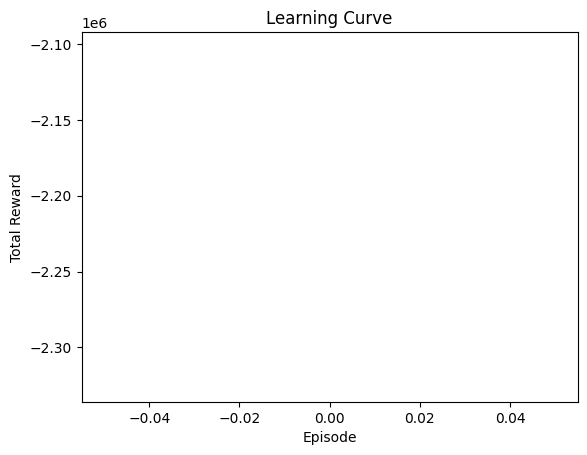

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1145.6
<built-in function next>
Episode 2, Total Reward: -2215147.350000006


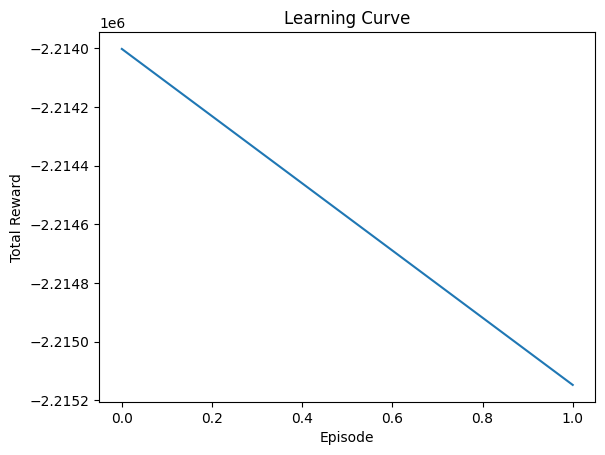

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1145.6
<built-in function next>
Episode 3, Total Reward: -2216292.9500000062


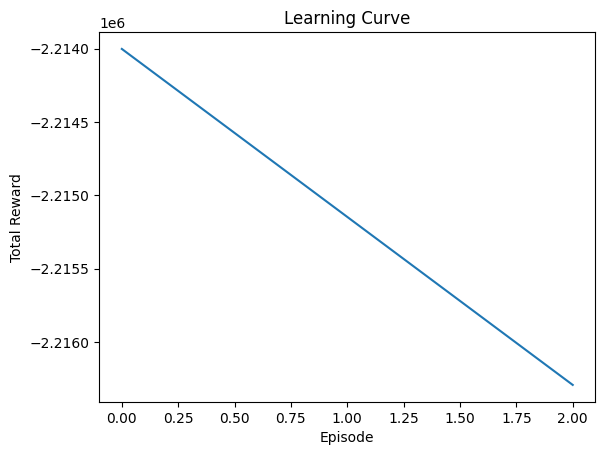

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 4, Total Reward: -2217440.000000006


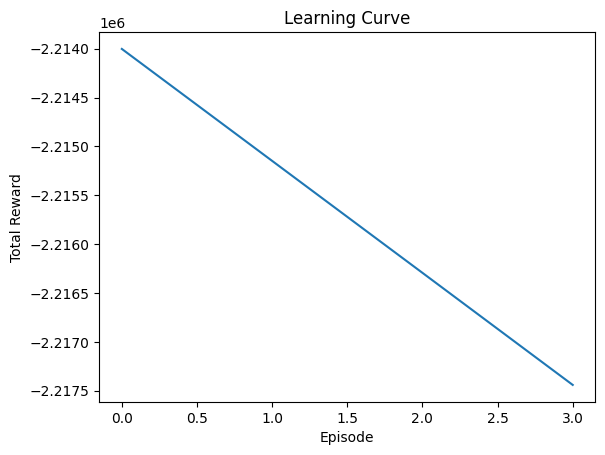

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 5, Total Reward: -2218587.050000006


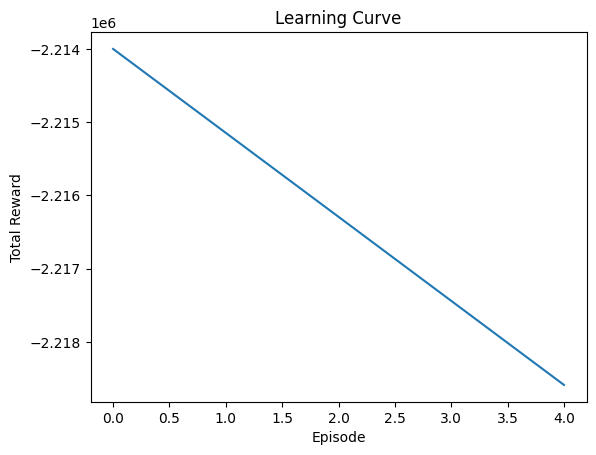

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 6, Total Reward: -2219734.1000000057


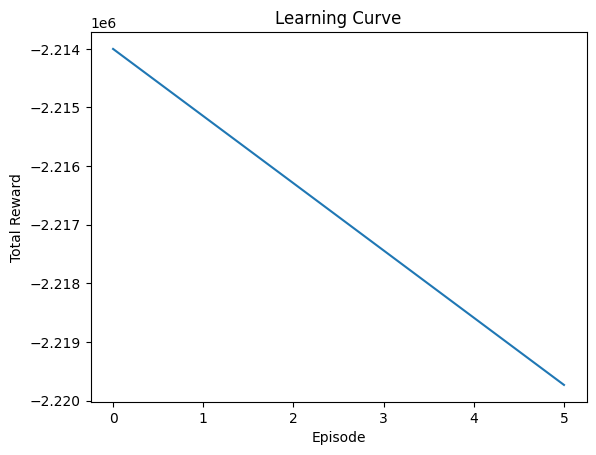

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 7, Total Reward: -2220881.1500000055


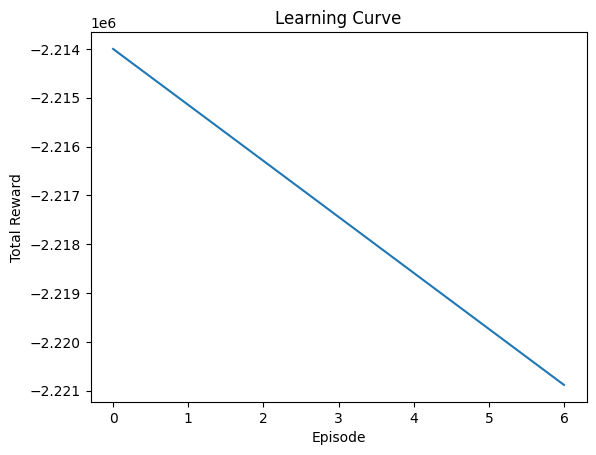

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 8, Total Reward: -2222028.2000000053


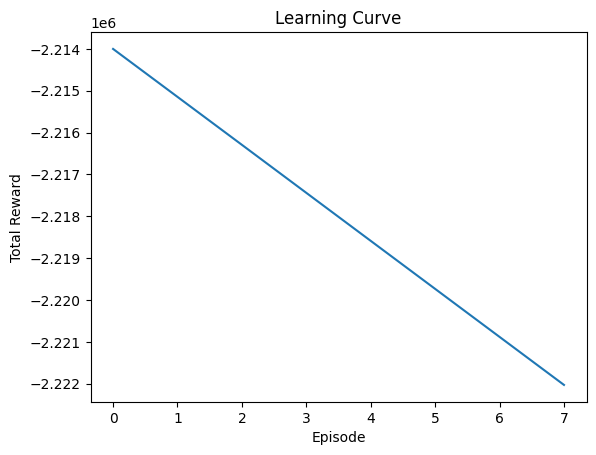

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 9, Total Reward: -2223175.250000005


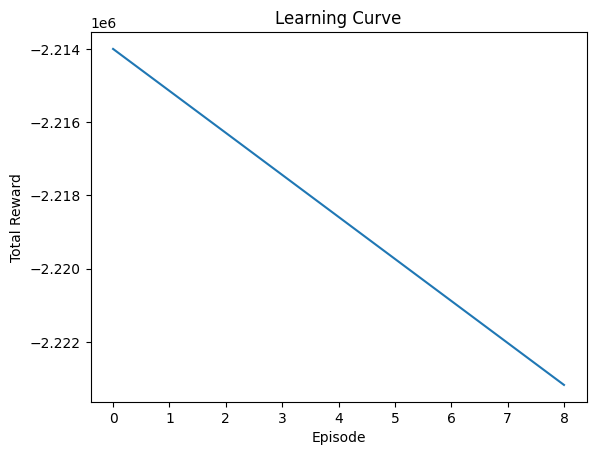

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 10, Total Reward: -2224322.300000005


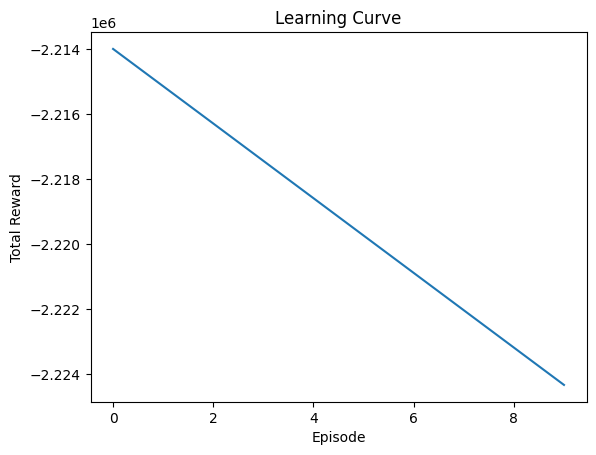

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 11, Total Reward: -2225469.3500000047


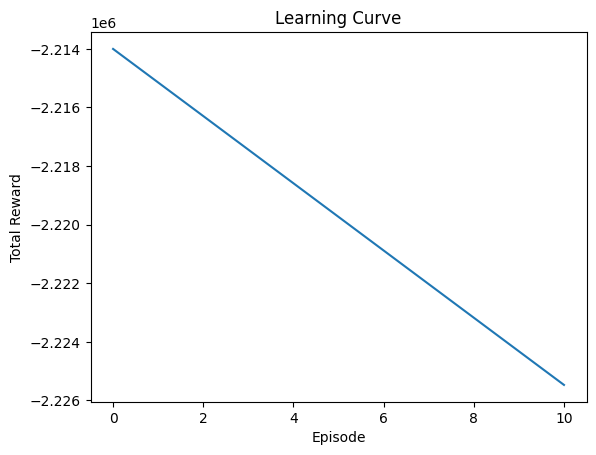

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 12, Total Reward: -2226616.4000000046


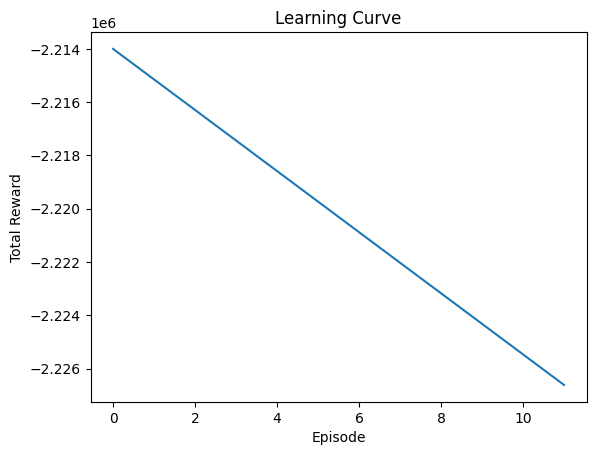

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 13, Total Reward: -2227763.4500000044


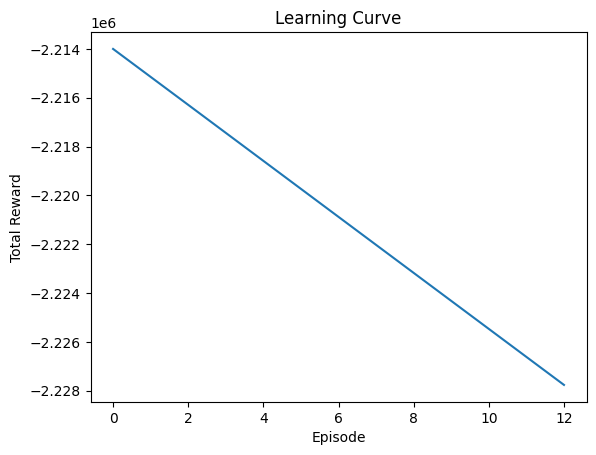

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 14, Total Reward: -2228910.500000004


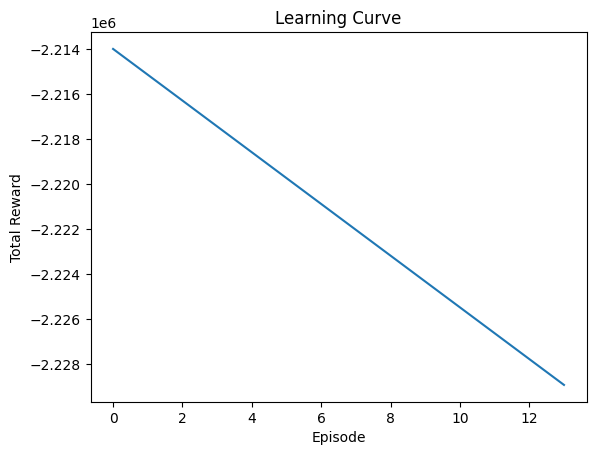

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 15, Total Reward: -2230057.550000004


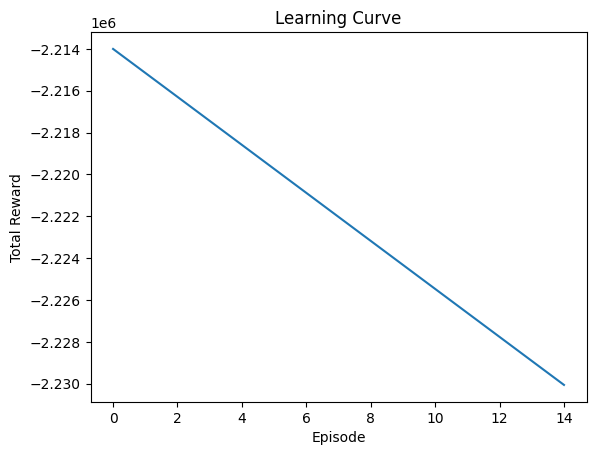

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 16, Total Reward: -2231204.600000004


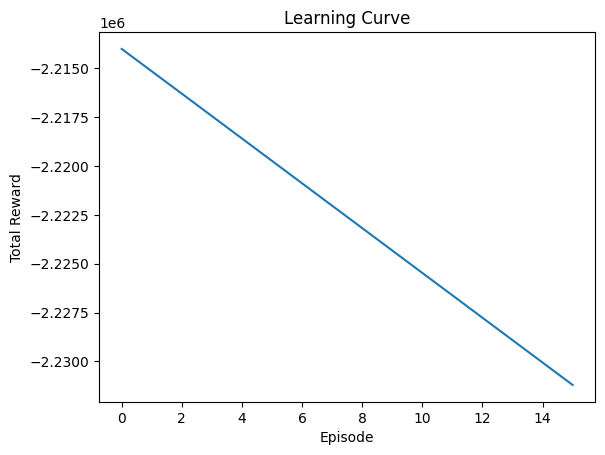

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 17, Total Reward: -2232351.6500000036


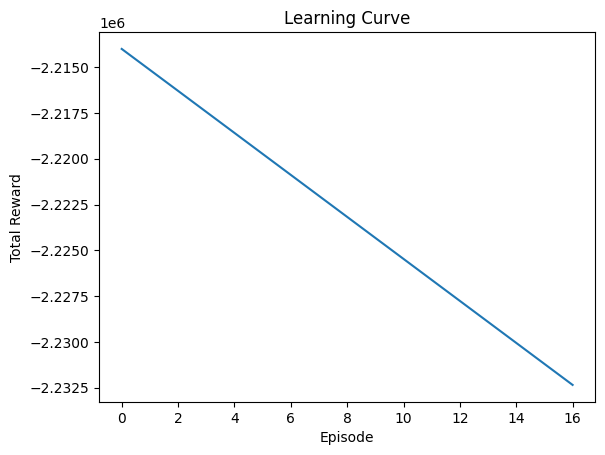

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 18, Total Reward: -2233498.7000000034


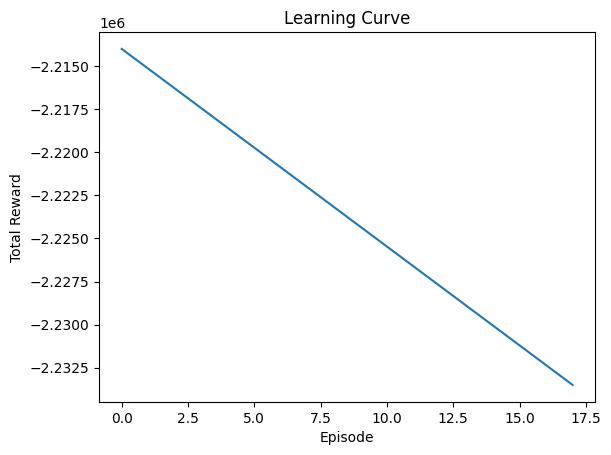

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 19, Total Reward: -2234645.7500000033


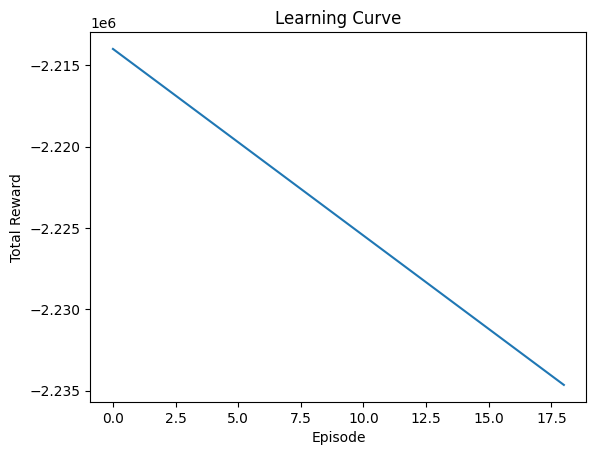

Within episode loop
Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05
<built-in function next>
Episode 20, Total Reward: -2235792.800000003


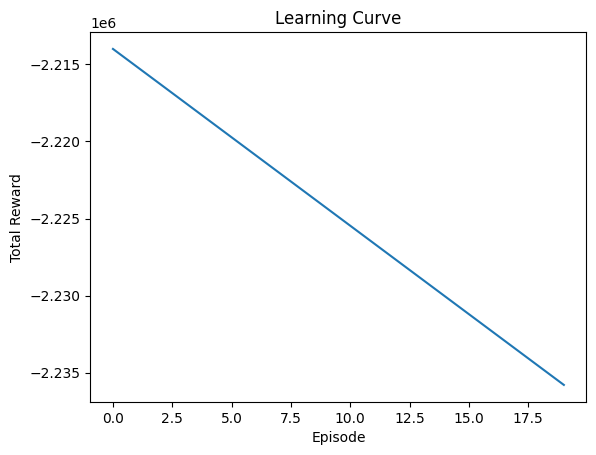

In [51]:

env = CourseEnv(initial_schedule, 20, 4, 13, 1000)

#Create and train the PPO model
# model = PPO('MlpPolicy', env, verbose=1, learning_rate =0.0001, batch_size =1024)
# model.learn(total_timesteps=500)

tensor_callback = TensorCallback()
# model = PPO('MlpPolicy', env, verbose=1, learning_rate=0.0001, batch_size=1024, tensorboard_log="./ppo_tensorboard/")
# model.learn(total_timesteps=1000, callback=tensor_callback)


model = PPO('MlpPolicy', env, verbose=1, learning_rate=0.0001, batch_size=1024)
model.learn(total_timesteps=1000)

rewards_history = []

for episode in range(20):
    print('Within episode loop')
    state = env.reset()
    total_reward = 0

    while True:
        action, _ = model.predict(state)
        next_state, reward, done, _ = env.step(action)
        print(next)
        env.render()
        total_reward += reward

        if done:
            print(f"Episode {episode + 1}, Total Reward: {total_reward}")
            rewards_history.append(total_reward)
            plt.plot(rewards_history)
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            plt.title('Learning Curve')
            plt.show()
            break

env.close()

In [52]:
# pip install tensorboard


In [53]:
#a

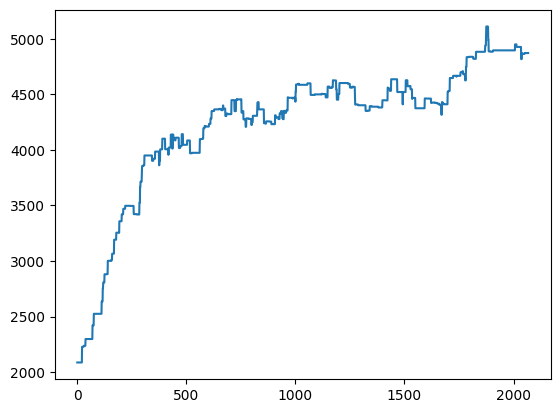

In [54]:
plt.plot(env.log['S1'])

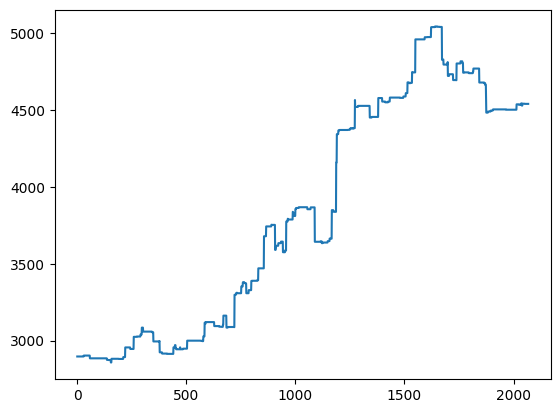

In [55]:
plt.plot(env.log['S2'])

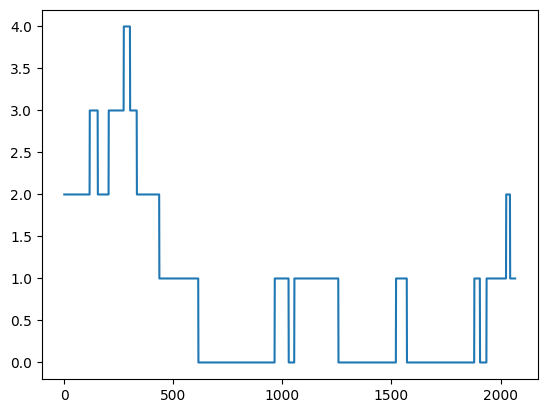

In [56]:
plt.plot(env.log['S6'])

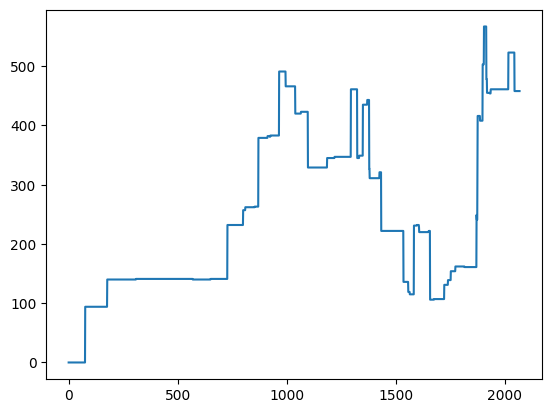

In [57]:
plt.plot(env.log['H1'])

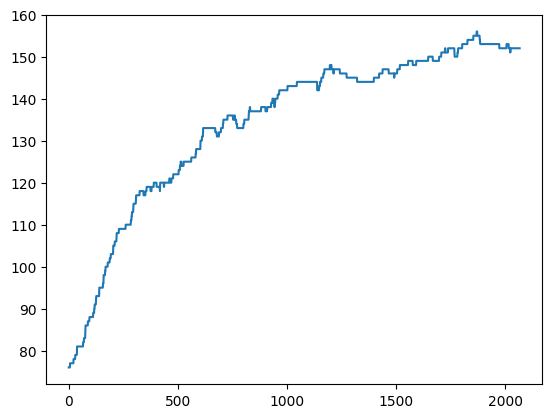

In [58]:
plt.plot(env.log['H2'])

In [59]:
# plt.plot(env.log['H3'])

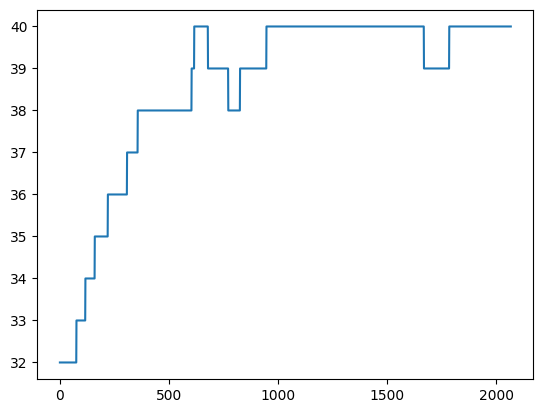

In [60]:
plt.plot(env.log['H4'])

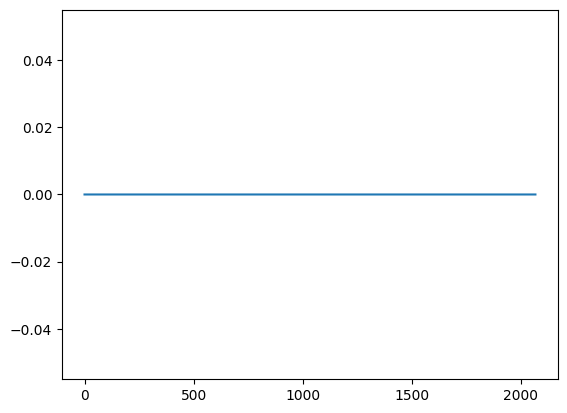

In [61]:
plt.plot(env.penalties)

In [62]:
env.penalties

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [63]:
next_state, reward, done, _ = env.step(action)

Total H1 violations 458
Total H2 violations 152
Total H3 violations 0
Total H4 violations 40
Constraint penalty -1147.05


In [64]:
next_state

array([[[      0., 5003095.,       0., ...,       0.,       0.,
               0.],
        [      0.,       0.,       0., ..., 5074130.,       0.,
               0.],
        [      0.,       0.,       0., ...,       0.,       0.,
         5171070.],
        [      0., 5003084.,       0., ...,       0.,       0.,
               0.]],

       [[5001610.,       0., 5081030., ...,       0., 5104211.,
         5003065.],
        [      0.,       0.,       0., ...,       0.,       0.,
               0.],
        [      0.,       0.,       0., ...,       0., 5100420.,
               0.],
        [6108201., 6100510.,       0., ...,       0., 5101010.,
         5003140.]],

       [[      0.,       0., 5101010., ..., 5000130.,       0.,
               0.],
        [      0., 5003143.,       0., ..., 5100350.,       0.,
               0.],
        [      0.,       0.,       0., ...,       0.,       0.,
               0.],
        [      0.,       0.,       0., ...,       0., 5171080.,
        

In [65]:
#a

In [66]:
# rewards_history = []

# for episode in range(20):
#     print('Within episode loop')
#     state = env.reset()
#     total_reward = 0

#     while True:
#         action, _ = model.predict(state)
#         next_state, reward, done, _ = env.step(action)
#         print(next)
#         env.render()
#         total_reward += reward

#         if done:
#             print(f"Episode {episode + 1}, Total Reward: {total_reward}")
#             rewards_history.append(total_reward)
#             plt.plot(rewards_history)
#             plt.xlabel('Episode')
#             plt.ylabel('Total Reward')
#             plt.title('Learning Curve')
#             plt.show()
#             break

# env.close()

In [67]:
# a

In [68]:
# model.save("ppo_course_model")

In [69]:
# env = CourseEnv(initial_schedule, 20, 4, 13, 3000)

# #Create and train the PPO model
# # model = PPO('MlpPolicy', env, verbose=1, learning_rate =0.0001, batch_size =1024)
# # model.learn(total_timesteps=500)

# tensor_callback = TensorCallback()

In [70]:

# # Load the model
# model = PPO.load("ppo_course_model")

In [71]:
# rewards_history = []

# for episode in range(20):
#     print('Within episode loop')
#     state = env.reset()
#     total_reward = 0

#     while True:
#         action, _ = model.predict(state)
#         next_state, reward, done, _ = env.step(action)
#         print(next)
#         env.render()
#         total_reward += reward

#         if done:
#             print(f"Episode {episode + 1}, Total Reward: {total_reward}")
#             rewards_history.append(total_reward)
#             plt.plot(rewards_history)
#             plt.xlabel('Episode')
#             plt.ylabel('Total Reward')
#             plt.title('Learning Curve')
#             plt.show()
#             break

# env.close()

without any params
Total H1 violations 80
Total H2 violations 111
Total H3 violations 0
Total S1 violations 7271
Total S2 violations 4185

learning rate 0.001
Total H1 violations 89
Total H2 violations 109
Total H3 violations 0
Total S1 violations 7136
Total S2 violations 3982

learning rate 0.0001 :
Total H1 violations 11
Total H2 violations 93
Total H3 violations 0
Total S1 violations 7470
Total S2 violations 3748

+batch size 128
Total H1 violations 7
Total H2 violations 114
Total H3 violations 0
Total S1 violations 7002
Total S2 violations 4039

+batch size 256
Total H1 violations 24
Total H2 violations 106
Total H3 violations 0
Total S1 violations 6293
Total S2 violations 4602



gamma 
Total H1 violations 67
Total H2 violations 126
Total H3 violations 0
Total S1 violations 6590
Total S2 violations 4380


5000 steps
1024 batches
Total H1 violations 343
Total H2 violations 148
Total H3 violations 0
Total S1 violations 5947
Total S2 violations 4803
Constraint penalty 52591

2056 batches
Total H1 violations 378
Total H2 violations 159
Total H3 violations 0
Total S1 violations 6225
Total S2 violations 4642
Constraint penalty 54929

512 batches

Total H1 violations 202
Total H2 violations 146
Total H3 violations 0
Total S1 violations 6044
Total S2 violations 4963

10000 steps
Total H1 violations 228
Total H2 violations 162
Total H3 violations 0
Total S1 violations 5929
Total S2 violations 4735
Constraint penalty 49195


15000 steps
learning_rate =0.0001, batch_size =512
Total H1 violations 343
Total H2 violations 165
Total H3 violations 0
Total S1 violations 5035
Total S2 violations 5519

ent_coef=0.01
Total H1 violations 359
Total H2 violations 169
Total H3 violations 0
Total S1 violations 5301
Total S2 violations 5599

batch size 1024
Total H1 violations 316
Total H2 violations 166
Total H3 violations 0
Total S1 violations 5737
Total S2 violations 4935

Done